# Öğe Bazlı Filtreleme (Item to Item Filtering)
## Amaç:
### Filmlere verilen reytingleri, İşbirlikçi Sistemler'in alt dalı olan Öğe Bazlı Filtreleme'yi kullanarak bir öneri sistemi yazmak istiyoruz.

#### Data set:
##### https://grouplens.org/datasets/movielens/100k/

## 1. Aşama: Verileri Hazırlama
### Tanımlamalar:
    user_id: Filmi değerlendiren kullanıcının id'si
    item_id: Filmin id'si
    rating: Kullanıcı tarafından filmlere 1 ile 5 arasında verilen değerlendirme
    timestamp: Filmin derecelendirildiği zaman(?)
    title: Filmlerin Başlığı

In [18]:
# Gerekli kütüphaneleri import ediyoruz
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#"100k Movielens" veri setimizi pandas kütüphanesini kullanarak projemize tanımlıyoruz.
# Veri setimizi tanımlarken 'names = ' kısmına verimizde bulunan sütun isimlerini koyuyoruz.
myDataSet = pd.read_csv("C:\\Users\\yunusEmre\\Desktop\\amazon\\ml-100k\\u.data", sep='\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])
#Veri setimizi kontrol ediyoruz.
myDataSet.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [20]:
#Film isimlerini projemize tanımlıyoruz
movieTitles = pd.read_csv("C:\\Users\\yunusEmre\\Desktop\\amazon\\ml-100k\\Movie_Titles.csv", encoding = 'unicode_escape')
#Bu aşamada myDataSet ile movieTitles'ı birleştiriyoruz (merge).
myDataSet = pd.merge(myDataSet, movieTitles, on = 'item_id')
#Veri setimizin son halini kontrol edelim.
myDataSet.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## 2. Aşama: Veri Keşfi

In [21]:
#Filmlerin istatistiksel özelliklerini getirelim.
myDataSet.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [22]:
# Film başına düşen değerlendirmelerin ortalamalarını tutacak bir değişken tanımlıyoruz.
# Burada 'title' başlığına göre sıralanmış verileri 'rating' başlığının ortalamasını hesaplayarak yeni 
# bir veri seti oluşturuyoruz.
ratings = pd.DataFrame(myDataSet.groupby('title')['rating'].mean())
#Yeni veri setimizi kontrol edelim.
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [26]:
#Değerlendirme sayılarını 'ratings' değişkenine ekleyelim
ratings['number_of_ratings'] = myDataSet.groupby('title')['rating'].count()
#Veri setimizin son halini kontrol edelim.
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


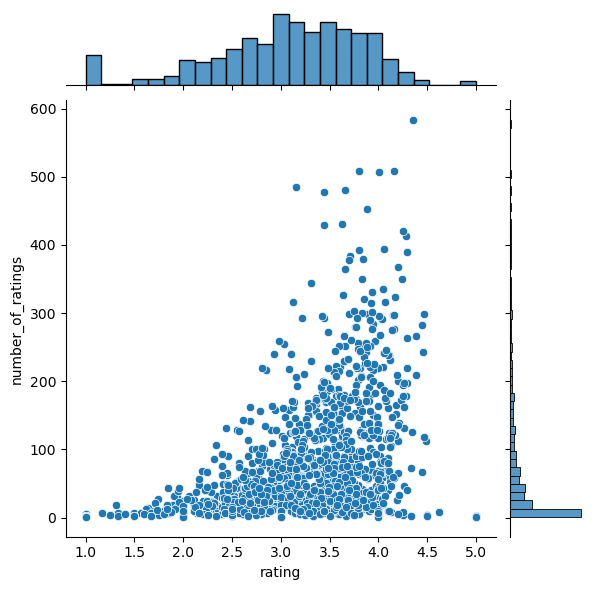

In [27]:
#Değerlendirme sayısı ile değerlendirmeler arasındaki ilişkiyi görselleştiriyoruz.
sns.jointplot(x = 'rating', y = 'number_of_ratings', data = ratings)

## 3. Aşama: Kullanıcı - Öğe Etkileşim Matrisi Oluşturma

In [45]:
# kullanıcı - öğe etkileşim matrisini oluşturduk.
filmMatrix_UII = myDataSet.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
#Yeni veri setimizi kontrol edelim.
filmMatrix_UII.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0


In [35]:
#Değerlendirmeye göre filmleri sıralıyoruz.
ratings.sort_values('number_of_ratings', ascending = False).head(10)

,rating,number_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [46]:
#Toy Story (1995) için değerlendirmeler getiriliyor.
tsUserRatings = filmMatrix_UII['Toy Story (1995)']
#Farklı filmlerle olan korelasyonu hesaplıyoruz.
similarToTS = filmMatrix_UII.corrwith(tsUserRatings)
#Verimizin çıktısını alıyoruz.
similarToTS.head()

E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.534522
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.232118
12 Angry Men (1957)          0.334943
187 (1997)                   0.651857
dtype: float64

### Minimum derecelendirme sayısı için bir eşik değer oluşturma

In [47]:
# Değerlendirmeleri getirmek için dataframe oluşturuyoruz.
corr_ts = pd.DataFrame(similarToTS, columns = ['Correlation'])
corr_ts.dropna(inplace=True)
#Verimizin çıktısını alıyoruz.
corr_ts.head()

,Correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


In [48]:
#Değerlendirmeleri getiriyoruz.
corr_ts = corr_ts.join(ratings['number_of_ratings'])
#Verimizin çıktısını alıyoruz.
corr_ts.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [49]:
#Burada Korelasyon'a göre film önerisini istiyoruz.
corr_ts[corr_ts['number_of_ratings'] > 300].sort_values(
    by = 'Correlation', ascending = False).head(10)

,Correlation,number_of_ratings
title,,
Toy Story (1995),1.000000,452
Raiders of the Lost Ark (1981),0.366414,420
Indiana Jones and the Last Crusade (1989),0.352870,331
Liar Liar (1997),0.342576,485
Back to the Future (1985),0.291803,350
Men in Black (1997),0.270904,303
Mission: Impossible (1996),0.265551,344
Air Force One (1997),0.234797,431
Forrest Gump (1994),0.232715,321
